In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import statsmodels.formula.api as smf # Import statsmodels.formula.api

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Definisikan dan sesuaikan model regresi pendapatan vs usia
model_usia_pendapatan = smf.ols('Pendapatan ~ Usia', data=df).fit()

# Menampilkan koefisien dari model regresi pendapatan vs usia
intercept_usia_pendapatan = model_usia_pendapatan.params['Intercept'] # Corrected typo
usia_coef_usia_pendapatan = model_usia_pendapatan.params['Usia'] # Corrected typo

# Mengambil jumlah kuadrat residual(SSR) dari model baru
ssr_usia_pendapatan = model_usia_pendapatan.ssr

print(f"Jumlah kuadrat Residual (SSR) untuk model Pendapatan vs Usia: {ssr_usia_pendapatan:.4f}")
print(f"Persamaan garis Regresi (Pendapatan vs Usia): ")
print(f"Pendapatan prediksi = {intercept_usia_pendapatan:.4f} + ({usia_coef_usia_pendapatan:.4f}) * Usia")

Saving data_bersih.xlsx to data_bersih (2).xlsx
Jumlah kuadrat Residual (SSR) untuk model Pendapatan vs Usia: 3596284929633566.5000
Persamaan garis Regresi (Pendapatan vs Usia): 
Pendapatan prediksi = 11549519.0745 + (9784.5599) * Usia


Hasil Uji Shapiro-Wilk Statistik: 0.9561,p-value=0.0001
Data tidak berdistribusi normal (menolak H0)


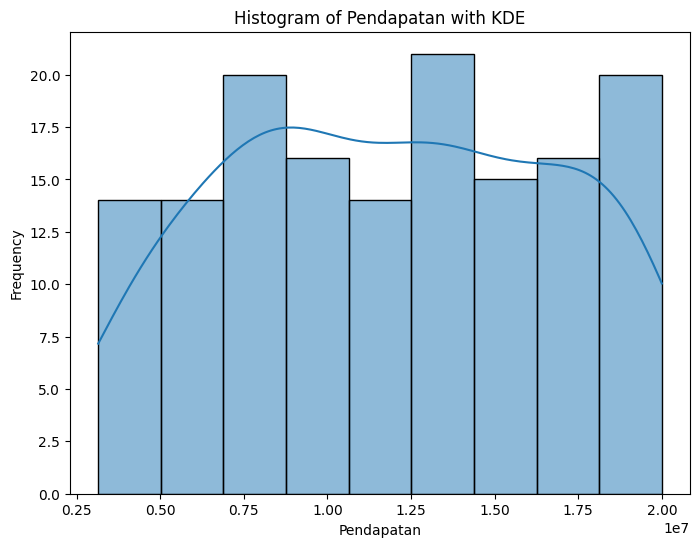

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_test = stats.shapiro(df['Pendapatan'])
print(f"Hasil Uji Shapiro-Wilk Statistik: {shapiro_test.statistic:.4f},p-value={shapiro_test.pvalue:.4f}")
alpha = 0.05
if shapiro_test.pvalue > alpha:
  print("Data kemungkinan berdistribusi normal (gagal menolak H0)")
else:
  print("Data tidak berdistribusi normal (menolak H0)")
plt.figure(figsize=(8, 6))
sns.histplot(df['Pendapatan'], kde=True)
plt.title('Histogram of Pendapatan with KDE')
plt.xlabel('Pendapatan')
plt.ylabel('Frequency')
plt.show()